# [Keras: The high-level API for TensorFlow](https://www.tensorflow.org/guide/keras) 

Keras is the high-level API of the TensorFlow platform. It covers every step of the machine learning workflow, from data processing to hyperparameter tuning to deployment. It was developed with a focus on enabling fast experimentation.

You can run Keras on a TPU Pod or large clusters of GPUs, and you can export Keras models to run in the browser or on mobile devices.

Note: If you have installed TensorFlow 2.0 or later, Keras is included in TensorFlow and you don't need to `pip install` it separately.

## Who should use Keras? Almost everyone
Every TensorFlow user should use the Keras APIs by default. Whether you're an engineer, a researcher, or an ML practitioner, you should start with Keras.

There are a [few use cases](https://www.tensorflow.org/guide/core#core_api_applications) that require the low-level TensorFlow Core APIs.

## Keras API key components
The core data structures of Keras are [layers](https://keras.io/api/layers/) and [models](https://keras.io/api/models/). A layer is a simple input/output transformation, and a model is a directed acyclic graph (DAG) of layers.

- `tf.keras.layers.Layer` and `tf.keras.Model` are the base classes for Keras layers and models.
- `tf.keras.Sequential` is a `tf.keras.Model` for linear stack of layers.
- The **Model** class has the following key methods:
  - `compile()`: Configures the model for training.
  - `fit()`: Trains the model.
  - `evaluate()`: Returns the loss value & metrics values for the model in test mode.
  - `predict()`: Generates output predictions for the input data.

### Other APIs and tools
- [Optimizers](https://keras.io/api/optimizers/)
- [Losses](https://keras.io/api/losses/)
- [Metrics](https://keras.io/api/metrics/)
- [Data loading utilities](https://keras.io/api/data_loading/)

For a full list of available APIs, see the [Keras API reference](https://keras.io/api/).

Let's get started...

In [1]:
import tensorflow as tf
import keras                    # keras is installed along with tensorflow
from keras import layers

print(keras.version())

2024-05-19 19:04:50.663160: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-19 19:04:50.664482: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-19 19:04:50.672982: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-19 19:04:50.794416: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 19:04:53.088060: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

3.3.3


# Build a Sequential model [[source]](https://www.tensorflow.org/guide/keras/sequential_model)

### Dense layer

The `tf.keras.layers.Dense` layer is a fully connected layer. 
It implements the operation: `output = activation(dot(input, kernel) + bias)` where:
- $a(\mathbf{x}) =$ `activation` is the element-wise activation function passed as the `activation` argument,
- $\mathbf{W} =$ `kernel` is a weights matrix created by the layer,
- $\mathbf{b} =$ `bias` is a bias vector created by the layer (only applicable if `use_bias` is `True`, True by default).

$ \mathbf{Y} = a\left(\mathbf{X} \cdot \mathbf{W} + \mathbf{B} \right) $

In [2]:

# Define Sequential model with 3 layers
model = keras.Sequential(name="my_sequential_model", layers=
    [
        keras.Input(shape=(3,), name="input"),                  # you should add the ',' after 3, to make it a valid shape tuple
        layers.Dense(4, name="layer1"),
        layers.Dense(4, name="layer3"),
    ]
)

model.summary()

x = tf.ones((2, 3))
print("\ninput:", x, "\n")

for i, l in enumerate(model.layers):
    print(i, l.name)
    for w in l.weights:
        print("\t", w.name, w.shape)

# Call model on a test input
y = model(x)
print("\noutput shape:", y.shape)
print("\noutput:", y, "\n")

#    X   dot    W    +  B
# (n, 3) dot (3, 4)  + (4,)   = (n, 4)
#       (n, 4)       + (4,)   = (n, 4)

Model: "my_sequential_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 4)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)


input: tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32) 

0 layer1
	 kernel (3, 4)
	 bias (4,)
1 layer3
	 kernel (4, 4)
	 bias (4,)

output shape: (2, 4)

output: tf.Tensor(
[[-0.07449061 -0.70831174 -1.1547122   0.5933945 ]
 [-0.07449061 -0.70831174 -1.1547122   0.5933945 ]], shape=(2, 4), dtype=float32) 



## A common debugging workflow: `add() + summary()`

When building a new Sequential architecture, it's useful to incrementally stack layers with add() and frequently print model summaries. For instance, this enables you to monitor how a stack of Conv2D and MaxPooling2D layers is downsampling image feature maps:

In [38]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(10))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 123, 123, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 121, 121, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,680 (45.62 KB)

 Trainable params: 11,680 (45.62 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 123, 123, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 121, 121, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 38, 38, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 36, 36, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,672 (190.12 KB)

 Trainable params: 48,672 (190.12 KB)

 Non-trainable params: 0 (0.00 B)

## You can also plot the model as a graph

`pip install pydot` and `pip install graphviz` are required to use this feature.

Also install the graphviz package: `sudo apt install graphviz`

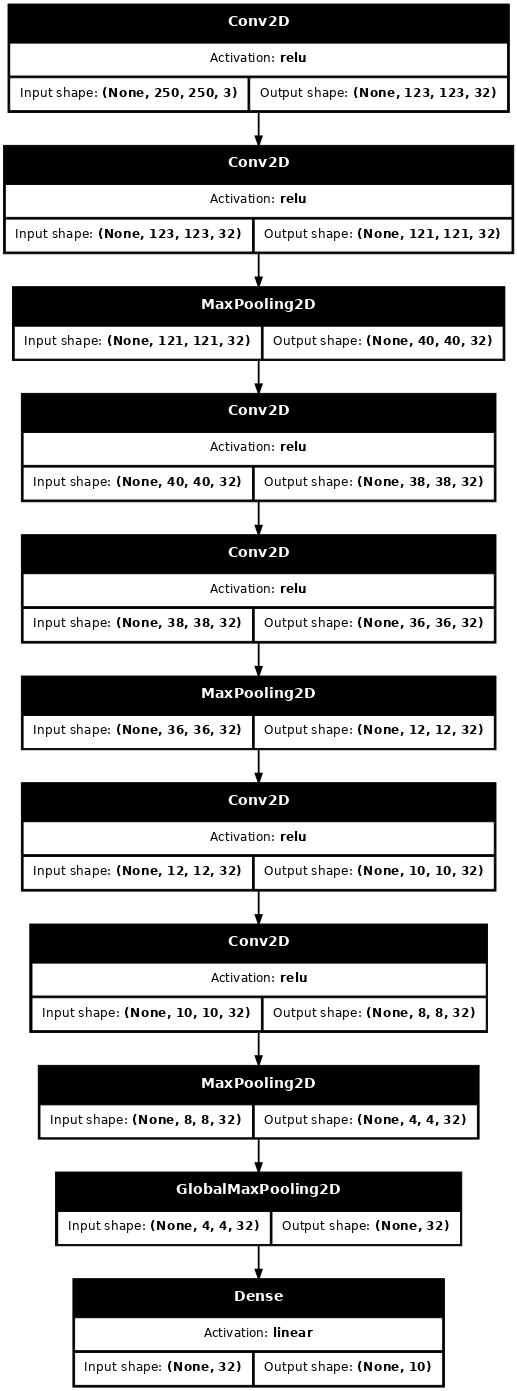

In [7]:
keras.utils.plot_model(model, show_shapes=True, dpi=64, show_layer_activations=True, to_file="my_first_plot_model.png")

# A toy ResNet

In [39]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])                                # residual connection 1

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])                                # residual connection 2

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 32, 32, 3) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 30, 30,    │        896 │ img[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 28, 28,    │     18,496 │ conv2d_26[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 9, 9, 64)  │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ conv2d_28[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 9, 9, 64)  │          0 │ conv2d_29[0][0],  │
│                     │                   │            │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ conv2d_30[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 9, 9, 64)  │          0 │ conv2d_31[0][0],  │
│                     │                   │            │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 7, 7, 64)  │     36,928 │ add_5[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ conv2d_32[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │     16,640 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 10)        │      2,570 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 223,242 (872.04 KB)

 Trainable params: 223,242 (872.04 KB)

 Non-trainable params: 0 (0.00 B)

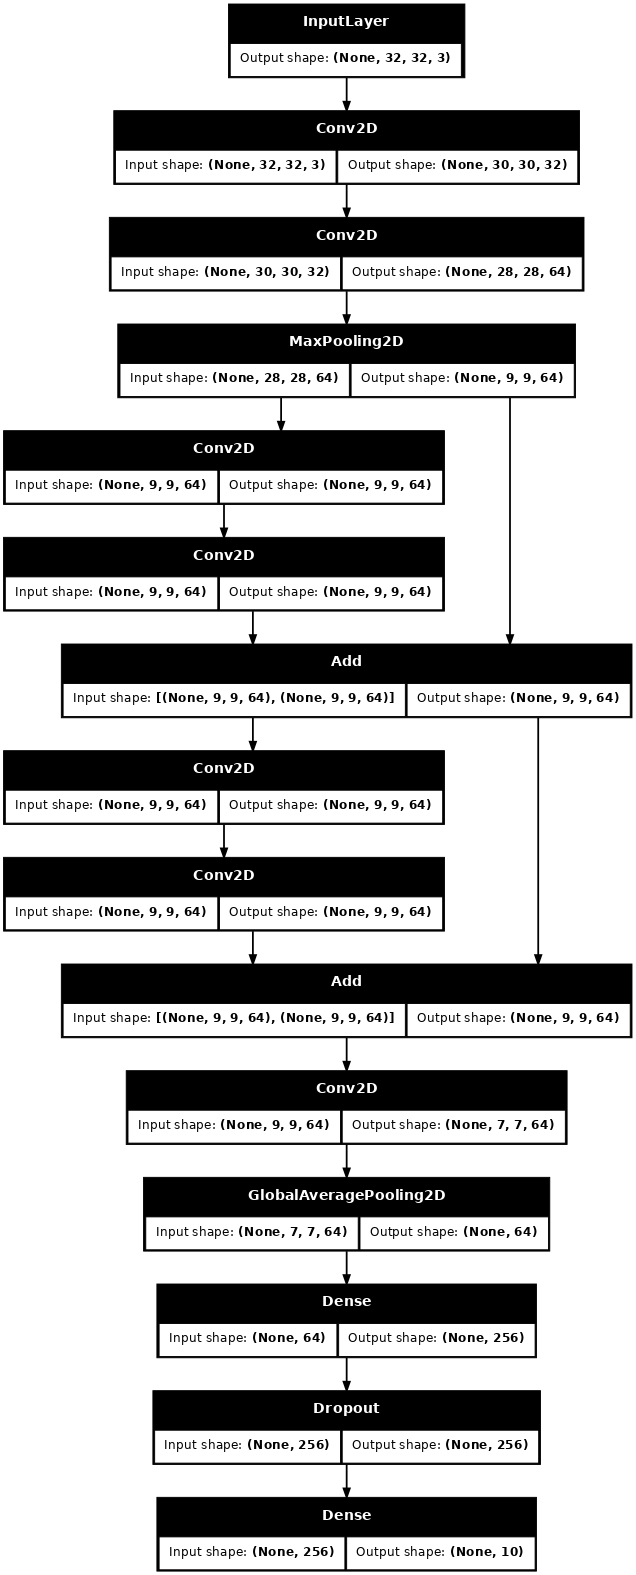

In [13]:
keras.utils.plot_model(model, "toy_resnet.png", show_shapes=True, dpi=64)

## Cifar10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

[https://www.tensorflow.org/datasets/catalog/cifar10](https://www.tensorflow.org/datasets/catalog/cifar10)

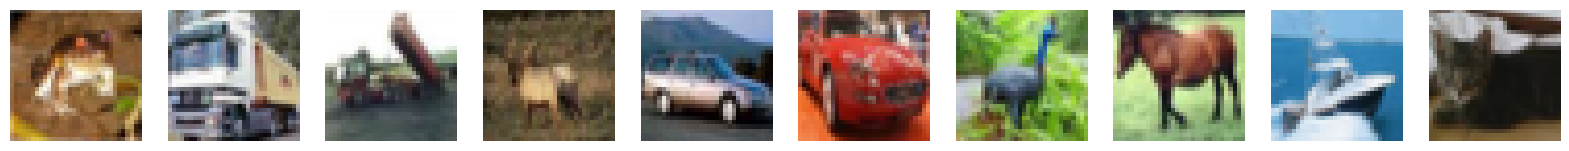

In [40]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    # optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(x_train[i])
    ax[i].axis('off')
plt.show()


In [41]:
# We restrict the data to the first 2000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
history = model.fit(x_train[:2000], y_train[:2000], epochs=50, batch_size=64, validation_split=0.2, verbose=True)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - acc: 0.1165 - loss: 2.2996 - val_acc: 0.1250 - val_loss: 2.2649
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - acc: 0.1357 - loss: 2.2527 - val_acc: 0.1575 - val_loss: 2.1879
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - acc: 0.1965 - loss: 2.1073 - val_acc: 0.2075 - val_loss: 2.0182
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - acc: 0.2267 - loss: 1.9849 - val_acc: 0.2100 - val_loss: 1.9544
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - acc: 0.2338 - loss: 1.9143 - val_acc: 0.2200 - val_loss: 1.9512
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - acc: 0.2556 - loss: 1.8741 - val_acc: 0.2725 - val_loss: 1.8322
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - acc: 0.2476 - loss: 1.8450 - val_acc: 0.2625 - val_loss: 1.8170
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - acc: 0.2819 - loss: 1.8141 - val_acc: 0.2950 - val_loss: 1.8021
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - a

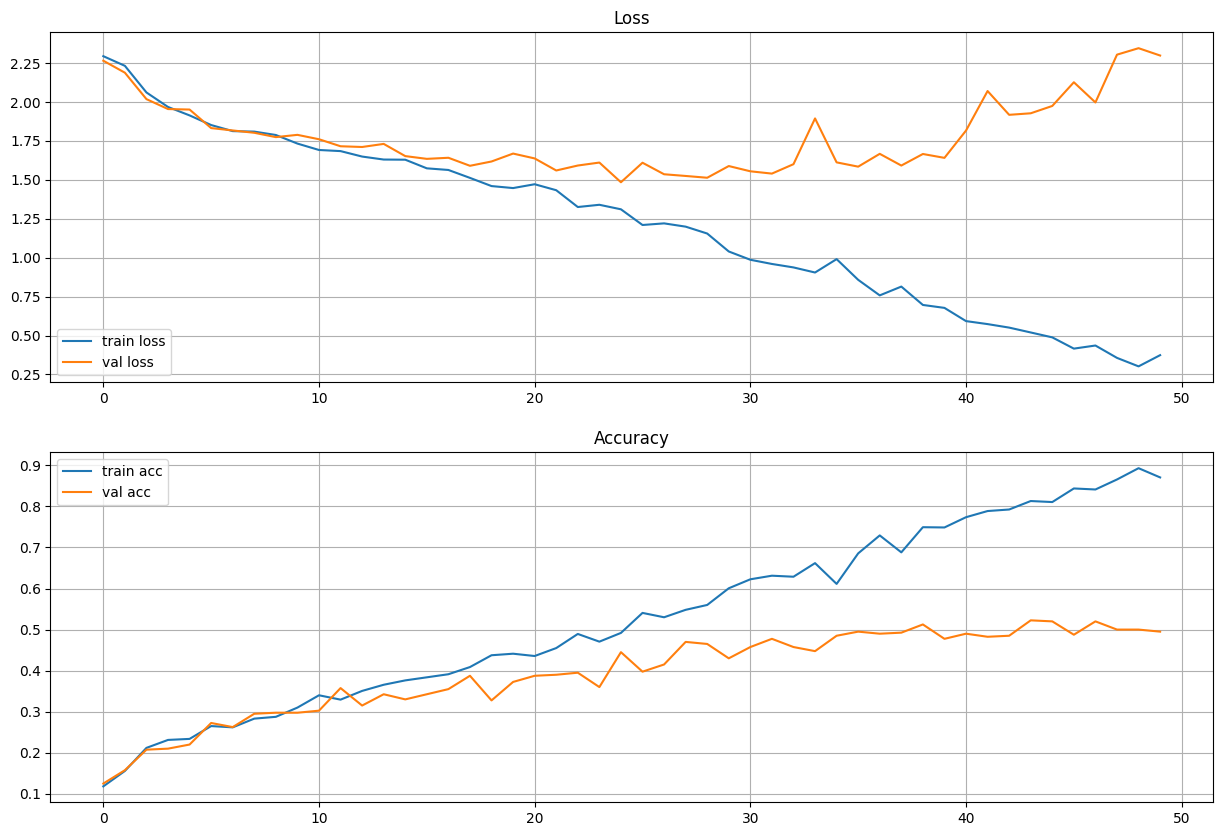

In [43]:
# plot history metrics
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(history.history["loss"], label="train loss")
ax[0].plot(history.history["val_loss"], label="val loss")
ax[0].legend()
ax[0].set_title("Loss")
ax[0].grid()

ax[1].plot(history.history["acc"], label="train acc")
ax[1].plot(history.history["val_acc"], label="val acc")
ax[1].legend()
ax[1].set_title("Accuracy")
ax[1].grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


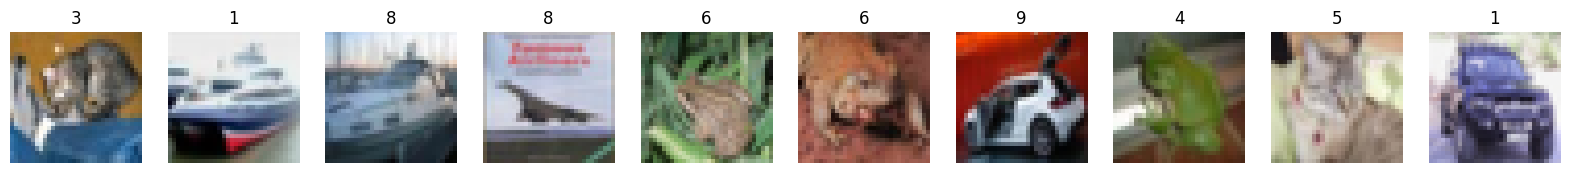

True labels:
[3 8 8 0 6 6 1 6 3 1]


In [46]:
# Try the model on some images

predictions = model.predict(x_test[:10])

fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(x_test[i])
    ax[i].axis('off')
    ax[i].set_title(np.argmax(predictions[i]))
plt.show()

# Print the labels  
print("True labels:")
print(np.argmax(y_test[:10], axis=1))